In [1]:
from PIL import Image
from PIL import ImageDraw, ImageFont
import pytesseract
from utils import *

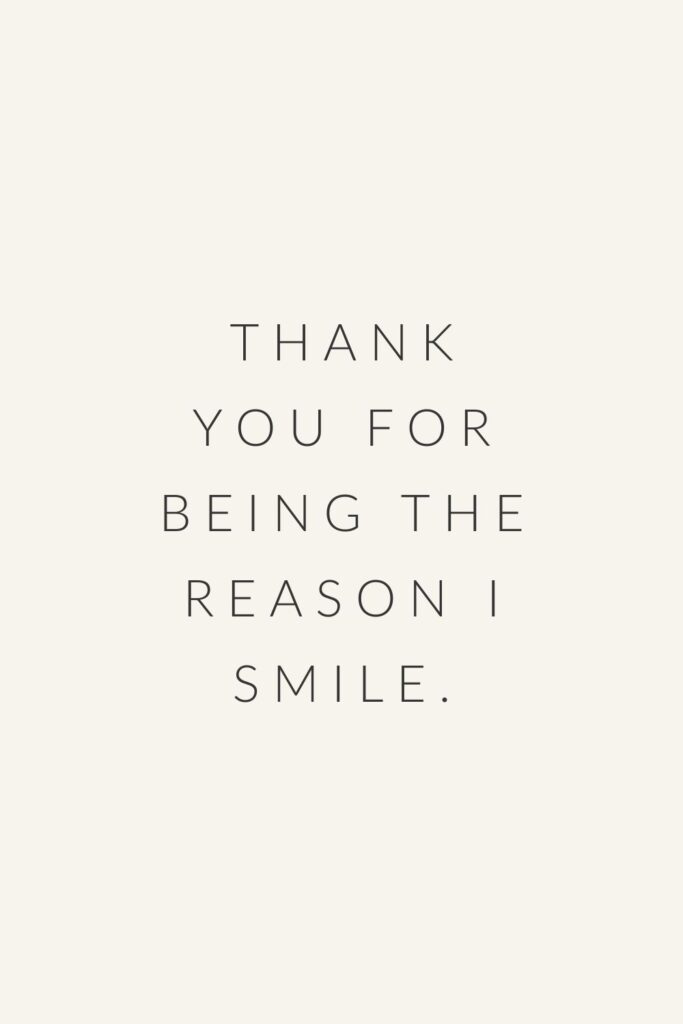

In [2]:
img_path = 'image/eng_sample1.png'
Image.open(img_path)

In [3]:
im = Image.open(img_path)
text = pytesseract.image_to_data(im, config="--psm 6",output_type='data.frame')
print(text)

    level  page_num  block_num  par_num  line_num  word_num  left  top  width  \
0       1         1          0        0         0         0     0    0    683   
1       2         1          1        0         0         0   164  324    358   
2       3         1          1        1         0         0   164  324    358   
3       4         1          1        1         1         0   230  324    222   
4       5         1          1        1         1         1   230  324    222   
5       4         1          1        1         2         0   193  409    296   
6       5         1          1        1         2         1   193  409    128   
7       5         1          1        1         2         2   370  409    119   
8       4         1          1        1         3         0   164  494    358   
9       5         1          1        1         3         1   164  494    194   
10      5         1          1        1         3         2   401  495    121   
11      4         1         

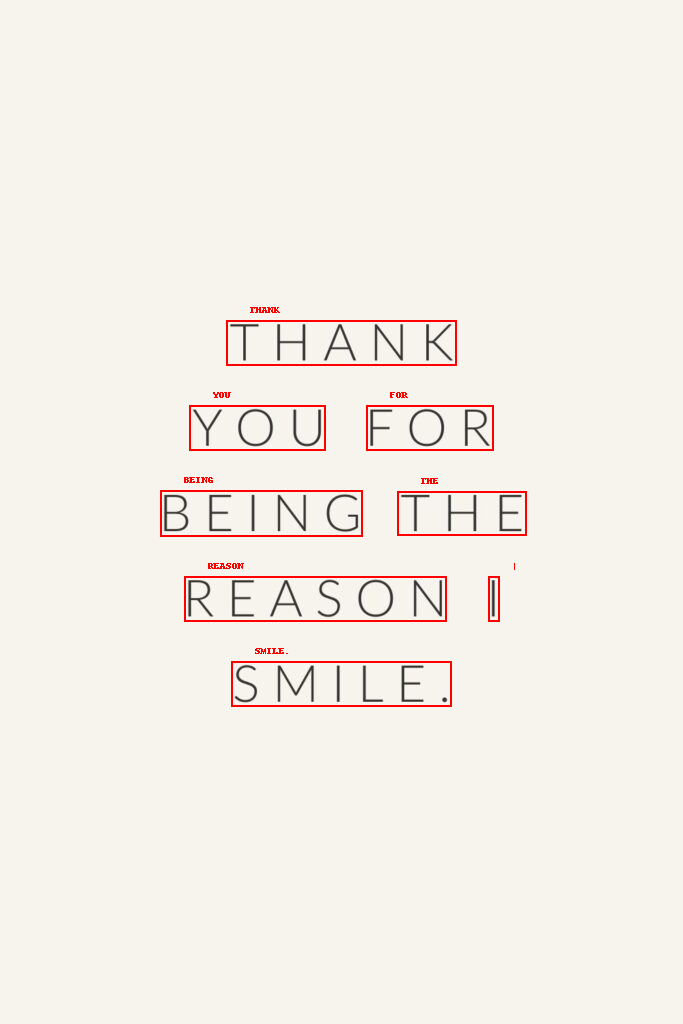

In [4]:
draw = ImageDraw.Draw(im)
font = ImageFont.load_default()
# or
# ImageFont.truetype("font path", 40)
padding = 4

words = text[text.conf > 0][["text"]].values
boxes = text[text.conf > 0][["left", "top", "width", "height"]].values

for word, box in zip(words, boxes):

  x, y, w, h = box
  draw.rectangle([x-padding, y-padding, x+w+padding, y+h+padding], outline="red",width=2)
  draw.text((box[0] + 20, box[1] - 20), text=word[0], fill="red", font=font)

im